In [1]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train_path = 'speech-based-classification-layer-10/train.csv'
valid_path = 'speech-based-classification-layer-10/valid.csv'
test_path = 'speech-based-classification-layer-10/test.csv'
train = pd.read_csv(train_path)
valid = pd.read_csv(valid_path)
test = pd.read_csv(test_path)
original_train = train.copy()
original_valid = train.copy()
original_test = test.copy()

# Mean Imputing

In [3]:
train.isnull().sum()

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64

In [4]:
mean_age = int(train['label_2'].mean())
train['label_2'].fillna(mean_age, inplace=True)
train['label_2'] = train['label_2'].astype(int)
train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.027083,0.072947,-0.093659,0.053418,-0.085516,-0.102610,-0.021217,0.016162,-0.184269,0.110335,...,-0.183643,0.091299,-0.037097,0.042607,-0.034361,-0.013748,45,27,1,6
1,0.070195,0.228641,-0.132860,-0.077761,-0.054993,-0.210365,0.127747,-0.132385,-0.161366,0.172764,...,-0.123668,0.029626,-0.027345,0.055223,-0.179725,0.136841,45,27,1,6
2,0.164312,0.052808,-0.058510,0.104724,-0.025886,-0.101427,-0.047177,0.091298,-0.094569,0.088062,...,0.075410,0.070125,0.043022,0.012972,-0.028920,0.096725,45,27,1,6
3,0.029730,0.113737,0.061113,-0.099329,-0.111600,-0.245942,0.086520,0.071996,0.028319,0.207910,...,-0.062511,-0.226912,-0.046011,0.011282,-0.095167,0.039979,45,27,1,6
4,0.031364,0.142409,-0.160743,-0.076594,-0.062412,-0.264732,0.079197,0.026060,-0.217023,0.084656,...,-0.193882,0.107297,-0.042355,0.046763,-0.192469,0.006463,45,27,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.035973,0.072715,-0.270282,0.091208,-0.191320,-0.216611,0.021817,0.023942,0.013130,0.092222,...,0.186235,-0.071871,0.134874,-0.046534,-0.049209,0.148759,39,29,1,6
28516,0.069470,0.087150,-0.020916,0.015028,0.011037,-0.119964,0.064952,-0.029355,-0.040469,0.037754,...,-0.064835,0.015068,-0.055220,-0.039519,-0.006166,-0.014526,39,29,1,6
28517,0.131181,0.151207,-0.054255,0.175156,0.054449,-0.178458,-0.031890,-0.071265,-0.031498,0.016970,...,-0.054301,0.016186,-0.051473,0.055153,-0.106647,-0.011164,39,29,1,6
28518,0.031407,0.095880,-0.040718,0.093964,-0.046821,-0.085009,0.020143,0.047911,-0.145057,0.021328,...,-0.115632,0.056439,-0.033905,0.031283,-0.095751,0.035147,39,29,1,6


In [5]:
valid.isnull().sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_768     0
label_1         0
label_2        14
label_3         0
label_4         0
Length: 772, dtype: int64

In [6]:
mean_age = int(train['label_2'].mean())
valid['label_2'].fillna(mean_age, inplace=True)
valid['label_2'] = valid['label_2'].astype(int)
valid

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.089057,0.072797,-0.076338,0.115915,-0.019868,-0.081843,-0.036667,0.006569,-0.077875,-0.014323,...,0.019353,0.162292,0.056965,-0.004469,-0.040084,0.072282,45,27,1,6
1,0.023128,0.081442,-0.091982,0.021188,-0.062825,-0.080544,0.015052,-0.067189,-0.157901,0.062454,...,-0.166827,0.201730,-0.062621,0.058383,-0.075039,0.023428,45,27,1,6
2,-0.024480,0.114591,0.011653,-0.036223,-0.033679,-0.157527,0.006977,-0.009106,0.064919,0.052810,...,-0.050036,0.003152,-0.015791,-0.003751,-0.080954,-0.008283,45,27,1,6
3,0.016545,0.076105,-0.080515,0.052122,-0.009976,-0.055965,0.005661,0.081433,-0.073674,-0.021476,...,0.068674,0.038822,0.062544,-0.039516,-0.056153,-0.041301,45,27,1,6
4,0.008559,0.036037,-0.043777,0.050584,-0.071815,-0.187329,0.001175,-0.059212,-0.062420,-0.007780,...,-0.128719,0.041103,0.089034,0.033583,-0.151146,-0.064672,45,27,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.137915,0.018654,-0.037206,0.129737,-0.050488,-0.162754,-0.025517,0.006736,-0.070894,0.109513,...,-0.205148,0.047071,-0.071692,0.109726,-0.073694,-0.057727,39,29,1,6
746,0.006322,0.089902,-0.107340,0.062628,-0.107365,0.002409,-0.008505,0.113627,-0.120738,0.064056,...,-0.052288,0.039313,-0.085648,-0.079630,-0.066545,-0.163933,39,29,1,6
747,0.036668,0.125310,-0.055670,0.095170,-0.023049,-0.177663,-0.010594,-0.025151,-0.022994,0.112005,...,-0.203588,0.025482,-0.100621,0.158005,-0.093643,-0.065391,39,29,1,6
748,0.108926,0.144031,-0.039965,0.168810,0.000203,-0.109862,-0.004499,-0.051219,-0.063053,-0.025315,...,-0.061261,0.057384,0.013137,0.054172,-0.044807,0.000401,39,29,1,6


# Label Data

In [7]:
train_features = train.iloc[:, :768]
train_label_2 = train.iloc[:, 769]

valid_features = valid.iloc[:, :768]
valid_label_2 = valid.iloc[:, 769]

test_features = test.iloc[:, :768]

Class Distribution Plot

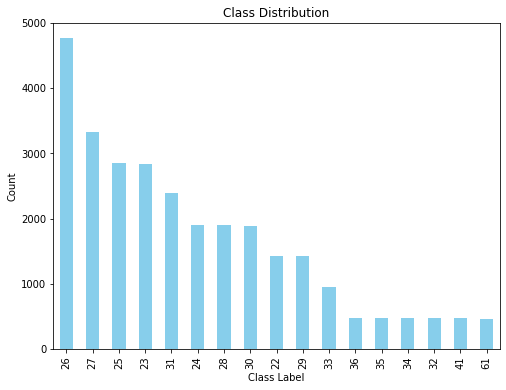

In [8]:
class_counts = train_label_2.value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')


plt.show()

From SVM and Random Forest classifiers choosing the best classification model
1. Stratified K Fold model is used for cross validation
2. Default parameters of classifcation models are used
3. Since classes are balanced accuracy score is used for the evaluation

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}


best_model = None
best_accuracy = 0.0


n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)

for name, clf in classifiers.items():
    total_accuracy = 0.0

    for train_index, test_index in skf.split(train_features, train_label_2):
        X_train, X_test = train_features.iloc[train_index], train_features.iloc[test_index]
        y_train, y_test = train_label_2[train_index], train_label_2[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        total_accuracy += accuracy

    average_accuracy = total_accuracy / n_splits
    print(f"{name} - Average Accuracy: {average_accuracy}")


    if average_accuracy > best_accuracy:
        best_model = clf
        best_accuracy = average_accuracy

print(f"Best Model: {type(best_model).__name__}")

Random Forest - Average Accuracy: 0.4167251051893408
SVM - Average Accuracy: 0.5042426367461431
Best Model: SVC


PCA Transformation 

In [10]:
from sklearn.decomposition import PCA

def performPca(train_input, valid_input,test_input, n_components):
    pca = PCA(n_components=n_components)
    train_reduced = pca.fit_transform(train_input)
    valid_reduced = pca.transform(valid_input)
    test_reduced = pca.transform(test_input)
    train_reduced_df = pd.DataFrame(train_reduced, columns=[f"new_feature_{i+1}" for i in range(train_reduced.shape[1])])
    valid_reduced_df = pd.DataFrame(valid_reduced, columns=[f"new_feature_{i+1}" for i in range(valid_reduced.shape[1])])
    test_reduced_df = pd.DataFrame(test_reduced, columns=[f"new_feature_{i+1}" for i in range(test_reduced.shape[1])])


    return train_reduced_df, valid_reduced_df,test_reduced_df

In [11]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
scaled_train_features = transformer.fit_transform(train_features)
scaled_valid_features = transformer.fit_transform(valid_features)
scaled_test_features = transformer.fit_transform(test_features)

In [12]:
train_reduced_df, valid_reduced_df,test_reduced_df = performPca(scaled_train_features, scaled_valid_features, scaled_test_features, 0.99)

In [13]:
model = SVC()
model.fit(train_reduced_df, train_label_2)
y_pred = model.predict(valid_reduced_df)
accuracy = accuracy_score(valid_label_2, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9293333333333333


In [14]:
test_pred = model.predict(test_reduced_df)

In [15]:
#Write to file
test_pred_df = pd.DataFrame(test_pred, columns=['label_2'])
test_pred_df.to_csv('predictions/label_2.csv', index=False)